<a href="https://colab.research.google.com/github/jsread/APSPlots2024/blob/main/Read_APS_Plots_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from scipy.stats import gaussian_kde

import requests
import h5py

In [ ]:
matplotlib.rcParams.update({'font.size': 20,  'mathtext.fontset': 'stix'})

matplotlib.rcParams['figure.figsize'] = (9.7082039325, 6.0)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 20.0
cmap = plt.cm.get_cmap('Set2', 6)

plt.style.use('dark_background')


<ipython-input-3-3e60a97a1776>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set2', 6)


Load data

In [ ]:
# url of public samples from the GWTC-1 release
# https://dcc.ligo.org/cgi-bin/DocDB/ShowDocument?.submit=Identifier&docid=P1800370&version=
samples_url="https://dcc.ligo.org/public/0157/P1800370/004/GW170817_GWTC-1.hdf5"
BNS_file = './GW170817_GWTC-1.hdf5'

# download samples and write to file
try:
  BNS = h5py.File(BNS_file, 'r')
except:
  r = requests.get(samples_url, allow_redirects=True)
  open('GW170817_GWTC-1.hdf5', 'wb').write(r.content)
  # read in file
  BNS = h5py.File(BNS_file, 'r')
BNS.keys()

<KeysViewHDF5 ['IMRPhenomPv2NRT_highSpin_posterior', 'IMRPhenomPv2NRT_highSpin_prior', 'IMRPhenomPv2NRT_lowSpin_posterior', 'IMRPhenomPv2NRT_lowSpin_prior']>

In [ ]:
# using the pandas infrastructure to read in samples and keep track of variable names
highSpinPos = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_highSpin_posterior']))
highSpinPri = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_highSpin_prior']))
lowSpinPos = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_lowSpin_posterior']))
lowSpinPri = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_lowSpin_prior']))
# list the samples variables
print(highSpinPri.keys())

Index(['costheta_jn', 'luminosity_distance_Mpc', 'right_ascension',
       'declination', 'm1_detector_frame_Msun', 'm2_detector_frame_Msun',
       'lambda1', 'lambda2', 'spin1', 'spin2', 'costilt1', 'costilt2'],
      dtype='object')


In [ ]:
GW170817_z0 = 0.0099 # GW170817 best fit redshift for reference;
# technically source frame masses should be used for EOS analyses
# this is a small correction for GW170817, can usually be neglected

In [ ]:
##GWTC-2 Data Release: Parameter Estimation Samples and Skymaps
#From public link from LIGO: https://dcc.ligo.org/P2000223/public

public_dcc_url= 'https://dcc.ligo.org/public/0169/P2000223/007/'
try:
  GW190425data = h5py.File('GW190425/GW190425.h5','r') #Load datafile.
except:
  !curl -O {public_dcc_url}"GW190425.tar" #Downloads the tar file
  !tar -xvf "GW190425.tar"
  GW190425data = h5py.File('GW190425/GW190425.h5','r') #Taking the content and listing files

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1179M  100 1179M    0     0  53.2M      0  0:00:22  0:00:22 --:--:-- 57.1M
GW190425/
GW190425/GW190425.h5
GW190425/GW190425_comoving.h5
GW190425/GW190425_AlignedSpinInspiralTidal_LS.fits
GW190425/GW190425_AlignedSpinTidal_HS.fits
GW190425/GW190425_AlignedSpinTidal_LS.fits
GW190425/GW190425_C01:IMRPhenomD_NRTidal-LS.fits
GW190425/GW190425_C01:TaylorF2-HS.fits
GW190425/GW190425_C01:IMRPhenomPv2_NRTidal-HS.fits
GW190425/GW190425_C01:IMRPhenomPv2_NRTidal-LS.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_HS.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_lowspin_RIFT.fits
GW190425/GW190425_C01:SEOBNRv4T_surrogate_LS.fits
GW190425/GW190425_C01:TaylorF2-LS.fits
GW190425/GW190425_C01:TEOBResumS-HS.fits
GW190425/GW190425_C01:TEOBResumS-LS.fits
GW190425/GW190425_PrecessingSpinIMRTidal_HS.fits
GW190425/GW190425_PrecessingSpinIMRTidal_LS.f

In [ ]:
#Bringing in the list of variables of GW190425

print(GW190425data.keys())


GW190425highSpinPos = pd.DataFrame.from_records(np.array(GW190425data['AlignedSpinTidal_HS']['posterior_samples']) )
GW190425lowSpinPos = pd.DataFrame.from_records(np.array(GW190425data['AlignedSpinTidal_LS']['posterior_samples']) )

#Choosing the wavefrom model and taking its posterior samples/data
print(GW190425highSpinPos.keys())

<KeysViewHDF5 ['AlignedSpinInspiralTidal_HS', 'AlignedSpinInspiralTidal_LS', 'AlignedSpinTidal_HS', 'AlignedSpinTidal_LS', 'C01:IMRPhenomD_NRTidal-HS', 'C01:IMRPhenomD_NRTidal-LS', 'C01:IMRPhenomPv2_NRTidal-HS', 'C01:IMRPhenomPv2_NRTidal-LS', 'C01:SEOBNRv4T_surrogate_HS', 'C01:SEOBNRv4T_surrogate_LS', 'C01:SEOBNRv4T_surrogate_highspin_RIFT', 'C01:SEOBNRv4T_surrogate_lowspin_RIFT', 'C01:TEOBResumS-HS', 'C01:TEOBResumS-LS', 'C01:TaylorF2-HS', 'C01:TaylorF2-LS', 'PrecessingSpinIMRTidal_HS', 'PrecessingSpinIMRTidal_LS', 'PublicationSamples', 'history', 'version']>
Index(['log_likelihood', 'chi_eff', 'total_mass_source', 'chi_p', 'spin_1y',
       'phi_2', 'phi_12', 'ra', 'phi_jl', 'lambda_2', 'tilt_2', 'cos_theta_jn',
       'a_2', 'lambda_tilde', 'mass_1', 'mass_ratio', 'cos_tilt_1', 'a_1',
       'phase', 'inverted_mass_ratio', 'mass_2', 'mass_2_source', 'dec', 'psi',
       'total_mass', 'theta_jn', 'redshift', 'delta_lambda', 'iota', 'spin_1x',
       'chirp_mass', 'lambda_1', 'cos_iot

In [ ]:
GW170817Lmax=5000 # uniform prior maximum lambda for both components
GW190425Lmax1=5000
GW190425Lmax2=10000

# Mass ratio, spin, and tidal effective parameters

In [ ]:
#from pycbc.conversions import chi_eff
def chi_eff(mass1, mass2, spin1z, spin2z):
    """Returns the effective spin from mass1, mass2, spin1z, and spin2z."""
    return (spin1z * mass1 + spin2z * mass2) / (mass1 + mass2)

In [ ]:
def mchirp_from_mass1_mass2(mass1, mass2):
    """Returns the chirp mass from mass1 and mass2."""
    return eta_from_mass1_mass2(mass1, mass2)**(3./5) * (mass1+mass2)
#from pycbc.conversions
def eta_from_mass1_mass2(mass1, mass2):
    """Returns the symmetric mass ratio from mass1 and mass2."""
    return mass1*mass2 / (mass1+mass2)**2.


In [ ]:
eta_from_mass1_mass2(2.3,2.3)

0.25

In [ ]:
def lambdatilde(lambda1,lambda2,m1,m2):
    mtotal = m1+m2
    m1fac=m1+12*m2
    m2fac=m2+12*m1
    return 16./13*(m1fac*m1**(4)*lambda1+m2fac*m2**(4)*lambda2)/mtotal**(5)

In [ ]:
 def lambdatilde_ofq(lambda1,lambda2,q):
    mtotal = 1+q
    m1fac=1+12*q
    m2fac=q+12
    return 16./13*(m1fac*lambda1+m2fac*q**(4)*lambda2)/mtotal**(5)

In [ ]:
highSpinPos['lamtilde']  = highSpinPos.apply(lambda row :  lambdatilde(row['lambda1'],
                     row['lambda2'],row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun']), axis = 1)
lowSpinPos['lamtilde']  = lowSpinPos.apply(lambda row : lambdatilde(row['lambda1'],
                     row['lambda2'],row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun']), axis = 1)
highSpinPri['lamtilde']  = highSpinPri.apply(lambda row :  lambdatilde(row['lambda1'],
                     row['lambda2'],row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun']), axis = 1)

In [ ]:
GW190425highSpinPos['lamtilde']  = GW190425highSpinPos.apply(lambda row :  lambdatilde(row['lambda_1'],
                     row['lambda_2'],row['mass_1'],row['mass_2']), axis = 1)
GW190425lowSpinPos['lamtilde']  = GW190425lowSpinPos.apply(lambda row : lambdatilde(row['lambda_1'],
                     row['lambda_2'],row['mass_1'],row['mass_2']), axis = 1)


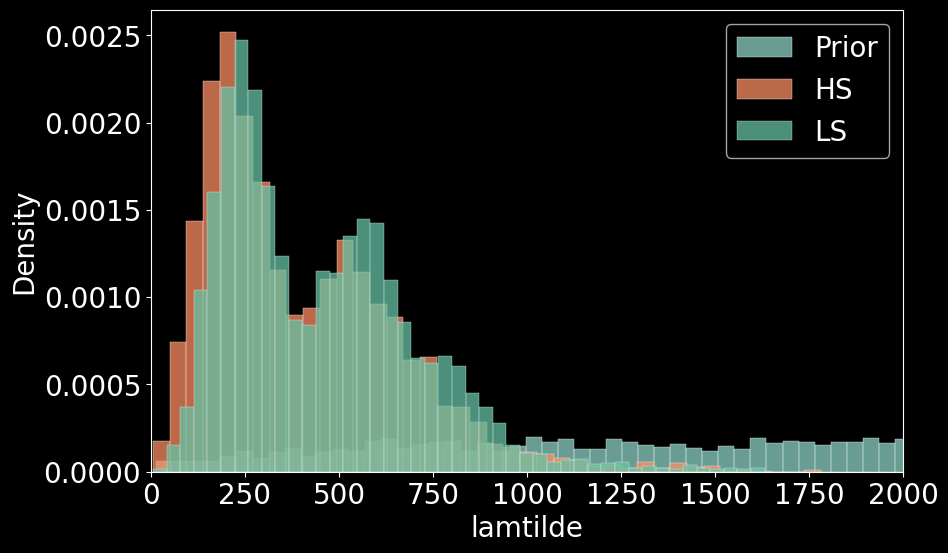

In [ ]:
sns.histplot(data=highSpinPri, x='lamtilde', stat='density', label='Prior',bins=200)
sns.histplot(data=highSpinPos, x='lamtilde',  color=cmap(1), stat='density', label='HS')
sns.histplot(data=lowSpinPos, x='lamtilde',  color=cmap(0), stat='density', label='LS')
plt.xlim(0,2000)
plt.legend()

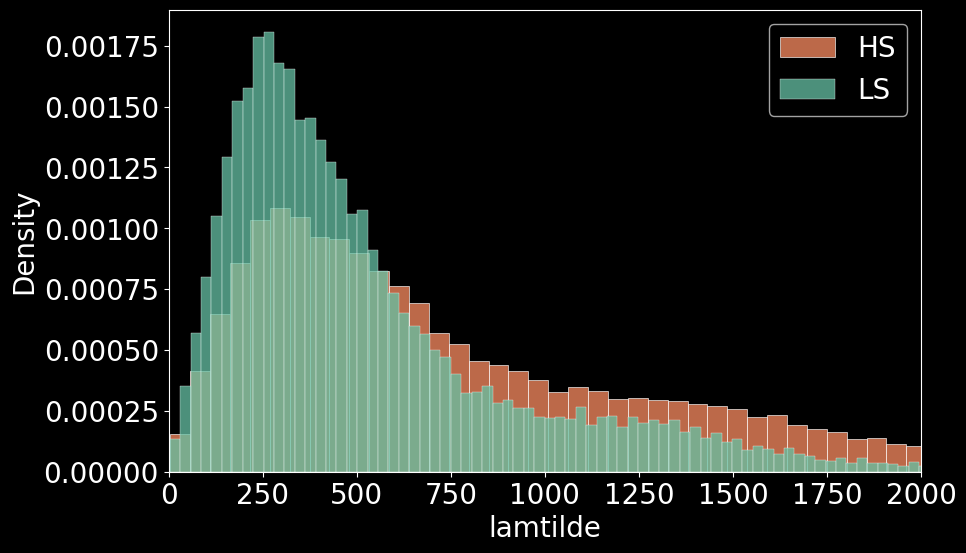

In [ ]:
sns.histplot(data=GW190425highSpinPos, x='lamtilde',  color=cmap(1), stat='density', label='HS')
sns.histplot(data=GW190425lowSpinPos, x='lamtilde',  color=cmap(0), stat='density', label='LS')
plt.xlim(0,2000)
plt.legend()

In [ ]:
highSpinPos['q']  = highSpinPos.apply(lambda row : row['m2_detector_frame_Msun']/row['m1_detector_frame_Msun'], axis = 1)
lowSpinPos['q']  = lowSpinPos.apply(lambda row : row['m2_detector_frame_Msun']/row['m1_detector_frame_Msun'], axis = 1)
highSpinPri['q']  = highSpinPri.apply(lambda row : row['m2_detector_frame_Msun']/row['m1_detector_frame_Msun'], axis = 1)

In [ ]:
GW190425highSpinPos['q']  = GW190425highSpinPos.apply(lambda row : row['mass_2']/row['mass_1'], axis = 1)
GW190425lowSpinPos['q']  = GW190425lowSpinPos.apply(lambda row : row['mass_2']/row['mass_1'], axis = 1)

In [ ]:
# q is calculated with detector frame masses
# however, both masses redshifted same amount to source frame in each sample
# source frame q should equal detector frame q
# similar for chi_eff

In [ ]:
highSpinPos['chi_eff']  = highSpinPos.apply(lambda row : chi_eff(row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun'],
                                            row['spin1']*row['costilt1'], row['spin2']*row['costilt2']), axis = 1)
lowSpinPos['chi_eff']  = lowSpinPos.apply(lambda row : chi_eff(row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun'],
                                            row['spin1']*row['costilt1'], row['spin2']*row['costilt2']), axis = 1)

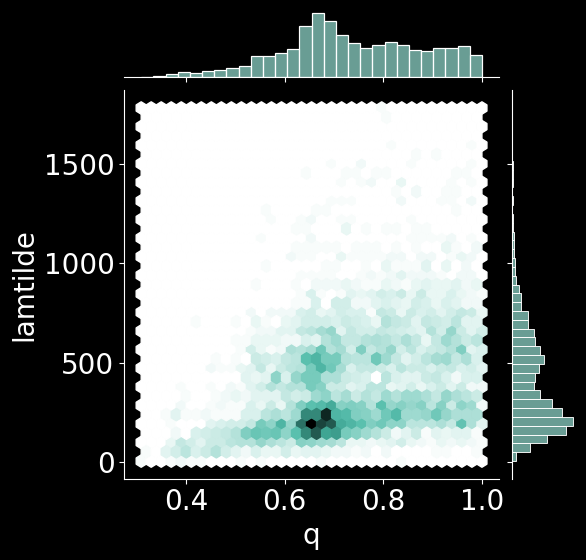

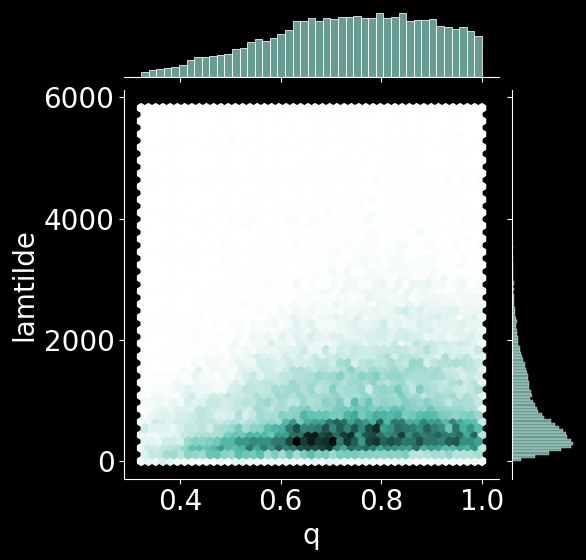

In [ ]:
# High Spin Posterior
sns.jointplot(data=highSpinPos, x="q", y="lamtilde",kind="hex")
sns.jointplot(data=GW190425highSpinPos, x="q", y="lamtilde",kind="hex")

# Reweighting to a flat prior in $\tilde \Lambda$  (from flat & uncorrelated in component $\Lambda_1$ and $\Lambda_2$)

In [ ]:
# This follows the procedure used in the GW190425 discovery paper
# May not be relevant depending on use case

# note these results also may shift a similar amount with the use of other waveform models

In [ ]:
# Analytic prior
# LT = A L1 + B L2
# LT = z

def unif_component_prior(q,z,Lmax1, Lmax2):
    #Lambda-tilde is called z here for conciseness
    mtotal = 1+q
    m1fac= 1+12*q
    m2fac= q+12
    A = 16./13*(m1fac)/mtotal**(5)
    B = 16./13*(m2fac*q**(4))/mtotal**(5)
    norm = A*B *Lmax1*Lmax2
    return  (np.heaviside(z / A,1.) * (
        z + (A * Lmax1 - z) * np.heaviside(z/A - Lmax1,1.) ) - np.heaviside(z/A - B * Lmax2/A, 1.) * (
        z - B * Lmax2 + (A * Lmax1 + B * Lmax2 - z) * np.heaviside(z/A - (A * Lmax1 + B * Lmax2) / A,1.)) )/norm

In [ ]:
# if we sample uniformly in components, this is the prior weight on each lambda-tilde sample
# (depends also on q)
highSpinPos['unif_prior']  = highSpinPos.apply(lambda row : unif_component_prior(row['q'],row['lamtilde'],GW170817Lmax,GW170817Lmax), axis = 1)
lowSpinPos['unif_prior']  = lowSpinPos.apply(lambda row : unif_component_prior(row['q'],row['lamtilde'],GW170817Lmax,GW170817Lmax), axis = 1)


In [ ]:
GW190425highSpinPos['unif_prior']  = GW190425highSpinPos.apply(lambda row : unif_component_prior(row['q'],row['lamtilde'],GW190425Lmax1,GW190425Lmax2), axis = 1)
GW190425lowSpinPos['unif_prior']  = GW190425lowSpinPos.apply(lambda row : unif_component_prior(row['q'],row['lamtilde'],GW190425Lmax1,GW190425Lmax2), axis = 1)


In [ ]:
# reweight from the uniform in component sampling to a flat prior on lambda-tilde
highSpinPos['weights'] = 1/ highSpinPos['unif_prior']
highSpinPos['weights']=highSpinPos['weights']/np.sum(highSpinPos['weights'])*len(highSpinPos['weights'])

lowSpinPos['weights'] = 1/ lowSpinPos['unif_prior']
lowSpinPos['weights']=lowSpinPos['weights']/np.sum(lowSpinPos['weights'])*len(lowSpinPos['weights'])

In [ ]:
GW190425highSpinPos['weights'] = 1/ GW190425highSpinPos['unif_prior']
GW190425highSpinPos['weights']=GW190425highSpinPos['weights']/np.sum(GW190425highSpinPos['weights'])*len(GW190425highSpinPos['weights'])

GW190425lowSpinPos['weights'] = 1/ GW190425lowSpinPos['unif_prior']
GW190425lowSpinPos['weights']=GW190425lowSpinPos['weights']/np.sum(GW190425lowSpinPos['weights'])*len(GW190425lowSpinPos['weights'])

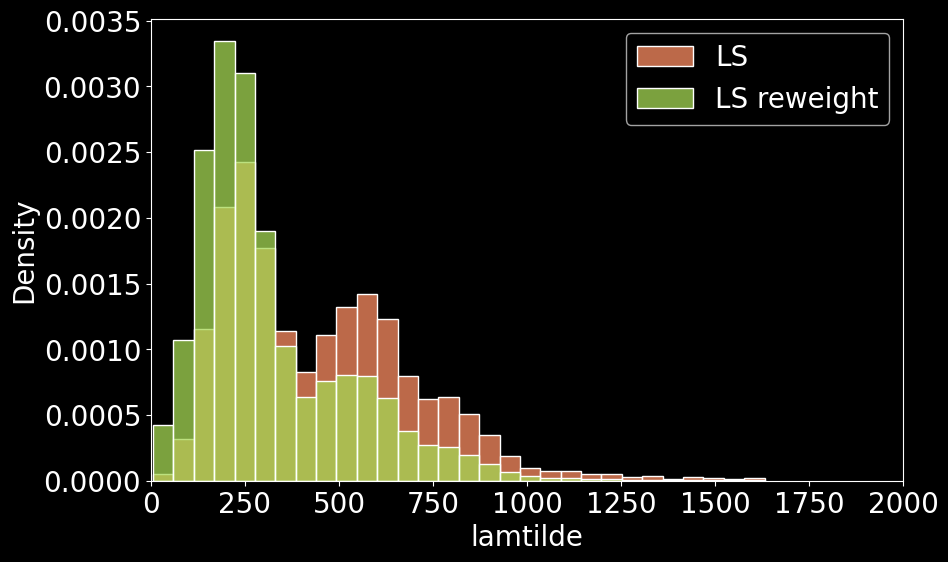

In [ ]:
sns.histplot(data=lowSpinPos, x='lamtilde',  color=cmap(1), stat='density', label='LS',bins=30)
sns.histplot(data=lowSpinPos, x='lamtilde',  color=cmap(3), label='LS reweight', stat='density',
            weights = 1./unif_component_prior(lowSpinPos['q'],lowSpinPos['lamtilde'],GW170817Lmax,GW170817Lmax),bins=30)
plt.xlim(0,2000)
plt.legend()
plt.show()

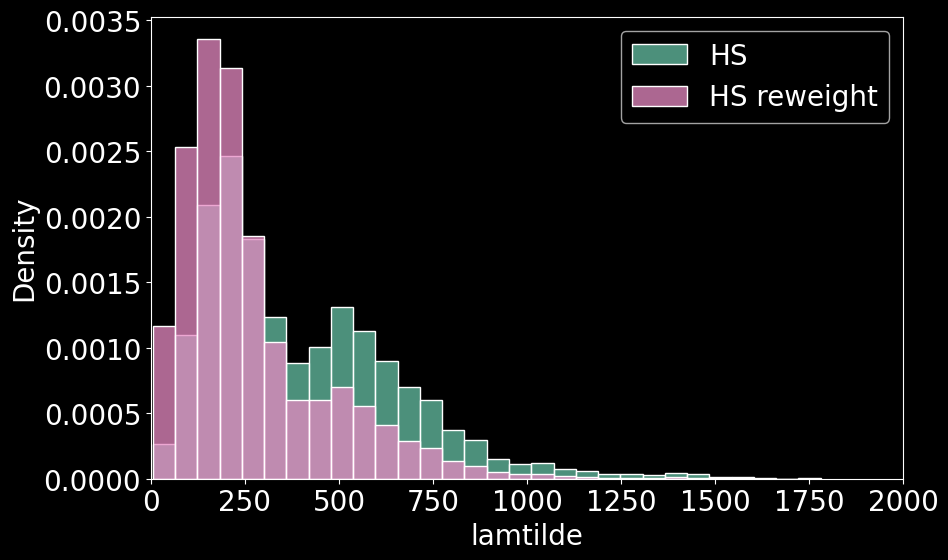

In [ ]:
sns.histplot(data=highSpinPos, x='lamtilde',  color=cmap(0), stat='density', label='HS',bins=30)
sns.histplot(data=highSpinPos, x='lamtilde',  color=cmap(2), label='HS reweight', stat='density',
            weights = highSpinPos['weights'],bins=30)
plt.xlim(0,2000)
plt.legend()
plt.show()

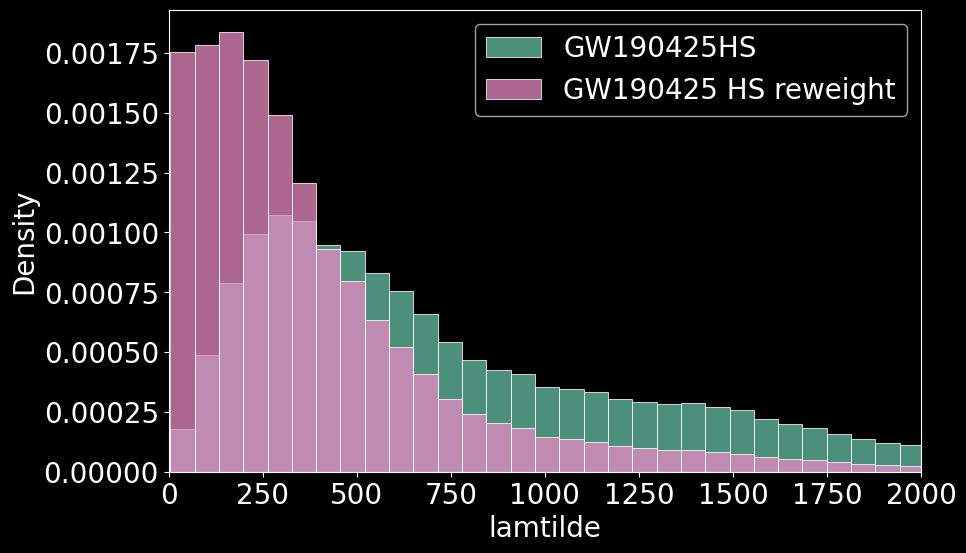

In [ ]:
sns.histplot(data=GW190425highSpinPos, x='lamtilde',  color=cmap(0), stat='density', label='GW190425HS',bins=90)
sns.histplot(data=GW190425highSpinPos, x='lamtilde',  color=cmap(2), label='GW190425 HS reweight', stat='density',
            weights = GW190425highSpinPos['weights'],bins=90)
plt.xlim(0,2000)
plt.legend()
plt.show()

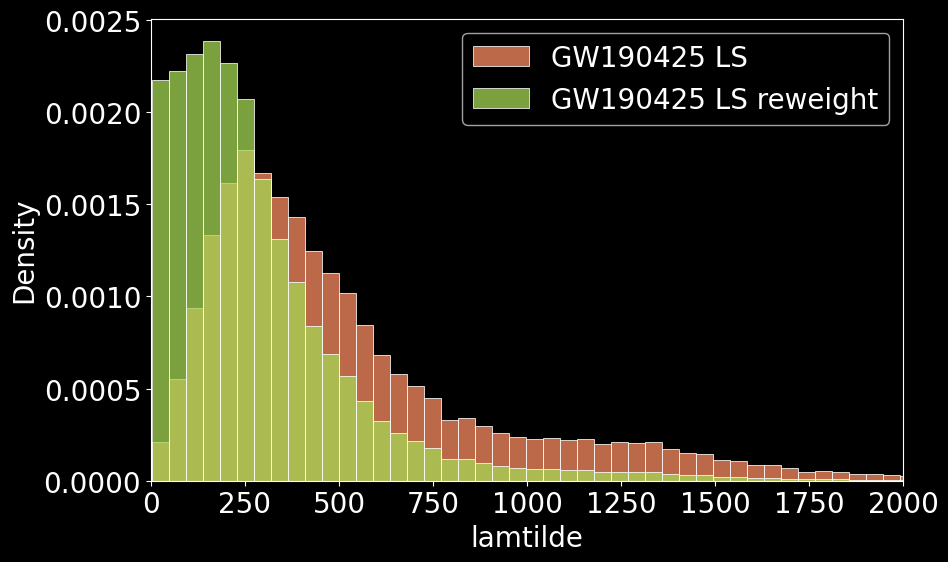

In [ ]:
sns.histplot(data=GW190425lowSpinPos, x='lamtilde',  color=cmap(1), stat='density', label='GW190425 LS',bins=90)
sns.histplot(data=GW190425lowSpinPos, x='lamtilde',  color=cmap(3), label='GW190425 LS reweight', stat='density',
            weights = GW190425lowSpinPos['weights'],bins=90)
plt.xlim(0,2000)
plt.legend()
plt.show()

In [ ]:
highSpinPos['mchirp']  = highSpinPos.apply(lambda row : mchirp_from_mass1_mass2(row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun']), axis = 1)
lowSpinPos['mchirp']  = lowSpinPos.apply(lambda row : mchirp_from_mass1_mass2(row['m1_detector_frame_Msun'],row['m2_detector_frame_Msun']), axis = 1)

In [ ]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy.cosmology import z_at_value

redshifts = np.linspace(
0.9*z_at_value(cosmo.luminosity_distance, highSpinPos['luminosity_distance_Mpc'].min() * u.Mpc),
1.1*z_at_value(cosmo.luminosity_distance, highSpinPos['luminosity_distance_Mpc'].max() * u.Mpc),100)

In [ ]:
from scipy.interpolate import interp1d
zfunc=interp1d(cosmo.luminosity_distance(redshifts).value, redshifts)

In [ ]:
highSpinPos['z']  = highSpinPos.apply(lambda row : zfunc(row['luminosity_distance_Mpc']), axis = 1)
lowSpinPos['z']  = lowSpinPos.apply(lambda row : zfunc(row['luminosity_distance_Mpc']), axis = 1)

In [ ]:
highSpinPos['mchirp_source']  = highSpinPos.apply(lambda row : row['mchirp']/(1+row['z']), axis = 1)
lowSpinPos['mchirp_source']  = lowSpinPos.apply(lambda row :row['mchirp']/(1+row['z']), axis = 1)

<ipython-input-39-efbef6c143f1>:5: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Text(0.5, 0, '$\\mathcal{M}_c$')

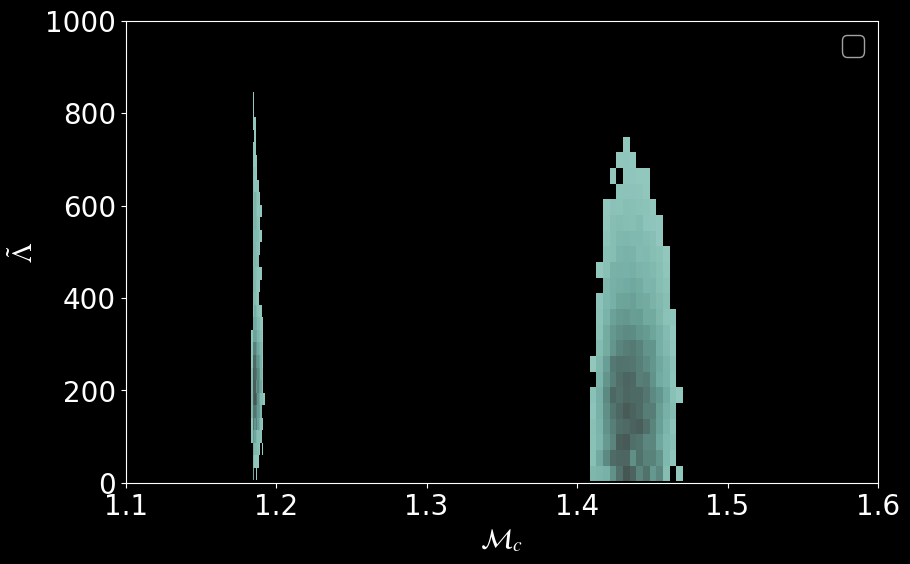

In [ ]:
sns.histplot(data=lowSpinPos, x='mchirp_source', y='lamtilde', label='GW170817', log_scale=(False,False),
            weights = lowSpinPos['weights'],bins = (10,60),pthresh=.1)
sns.histplot(data=GW190425lowSpinPos, x='chirp_mass_source', y='lamtilde', label='GW190425',log_scale=(False,False),
            weights = GW190425lowSpinPos['weights'],bins=(20,120),pthresh=.1)
plt.legend()
plt.xlim(1.1,1.6)
plt.ylim(0,1000)
plt.ylabel(r'$\tilde\Lambda$')
plt.xlabel(r'$\mathcal{M}_c$')

# Compare to EOS

In [ ]:
!pip install lalsuite
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import lalsimulation as lalsim
import lal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99256 sha256=8f707c96ca3bd03877960033e56652c676032bf5d5e06c252acd2c56ce1a9e8a
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [ ]:
def mass1_from_mchirp_q(mchirp, q):
    """Returns the primary mass from the given chirp mass and mass ratio."""
    mass1 = (q**(2./5.))*((1.0 + q)**(1./5.))*mchirp
    return mass1


def mass2_from_mchirp_q(mchirp, q):
    """Returns the secondary mass from the given chirp mass and mass ratio."""
    mass2 = (q**(-3./5.))*((1.0 + q)**(1./5.))*mchirp
    return mass2

In [ ]:
eoss = [
            "ALF1", "ALF2", "ALF3", "ALF4",
        #"AP1", "AP2", "AP3",
        #    "AP4", "APR4_EPP",
        "BBB2", "BGN1H1", "BPAL12",
        "BSK19", "BSK20", "BSK21",
        #"ENG",
        "FPS", "GNH3",
       # "GS1", this doesn't import properly; legacy EOS
        "GS2",
        "H1", "H2", "H3", "H4", "H5", "H6", "H7",
        "MPA1", "MS1B", # "MS1B_PP", "MS1_PP",
        "MS1", "MS2",
        "PAL6", "PCL2", #"PS",
        "QMC700",
        "SLY4", #"SLY",
        #"SQM1", "SQM2", "SQM3", #bare strange stars, don't play well with integration bounds here
        "WFF1", "WFF2", "WFF3",

        "APR", "BHF_BBB2",
        "KDE0V", "KDE0V1", # "RS",
        "SK255", "SK272",
        #"SKA",
        "SKB", "SKI2", "SKI3", # "SKI4", "SKI5", "SKI6",
        "SKMP", "SKOP",
        #"SLY2",
        "SLY230A", "SLY9",

        "HQC18"
]

In [ ]:
radii = []
maxmasses = []
for eos in eoss:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
        #print(eos)
    except:
        print(eos)
        continue
    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    refrad= lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    maxmass = lalsim.SimNeutronStarMaximumMass(fam)
    radii.append(refrad)
    maxmasses.append(maxmass/lal.MSUN_SI)

In [ ]:
radii = np.array(radii)[np.array(maxmasses) > 1.95]
eoss = np.array(eoss)[np.array(maxmasses) > 1.95]

In [ ]:
rmax = max(radii)
rmin = min(radii)
print(rmin, ' to ', rmax)

10419.529722157571  to  15074.220674732416


In [ ]:
mchirp_from_mass1_mass2(1.0,1.0)

0.8705505632961241

In [ ]:
np.array(eoss)[np.argsort(np.array(radii))]#[np.array(maxmasses) > 2.0]

array(['WFF1', 'WFF2', 'APR', 'KDE0V', 'HQC18', 'KDE0V1', 'BSK20', 'SLY4',
       'SLY230A', 'QMC700', 'SKOP', 'SKB', 'SLY9', 'SKMP', 'MPA1',
       'BSK21', 'SK255', 'ALF2', 'SK272', 'SKI2', 'SKI3', 'H4', 'GNH3',
       'MS1B', 'MS1'], dtype='<U8')

<ipython-input-48-78f3ee67d7a7>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)


Text(0.5, 1.0, '$R_{1.4}$ (km)')

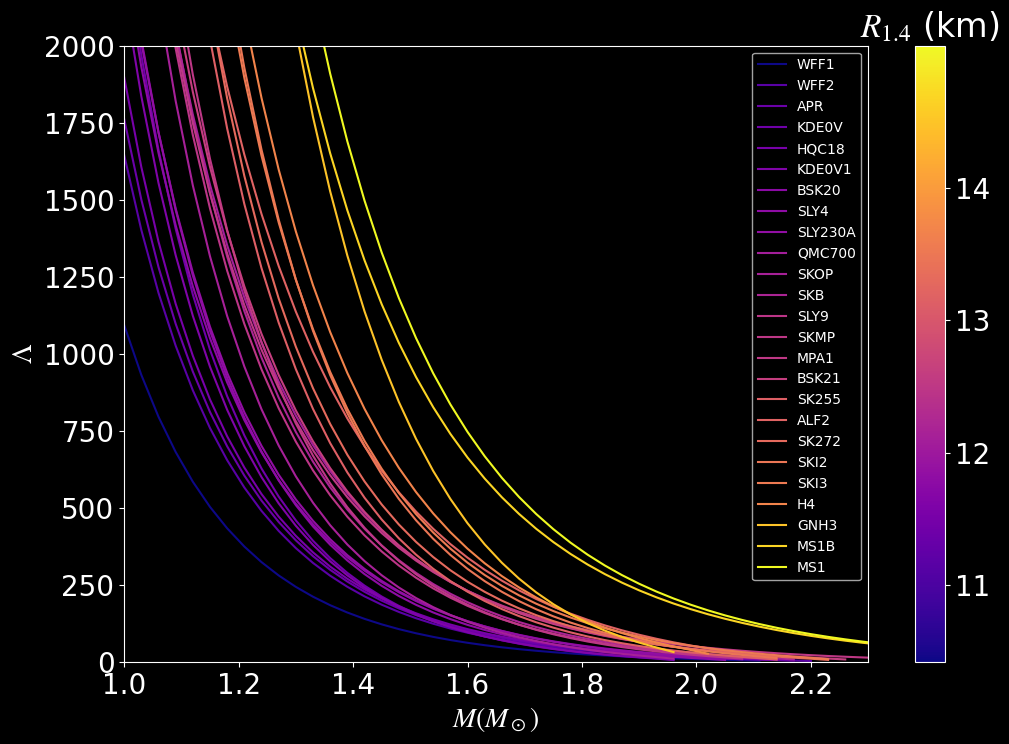

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))

for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
#        print(eos)
    except:
        continue
    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))
    mlamtable=[]
    for q in [1]:
      tbl2 = [[],[]]
      sml = lalsim.SimNeutronStarFamMinimumMass(fam) / q  # minimum mass for this EOS, in kg
      big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
      m   = max(sml, lal.MSUN_SI / q)                     # mass of the star. will be iterated over from sml to big
      while m < big:
        rad1 = lalsim.SimNeutronStarRadius(m, fam)
        lov1 = lalsim.SimNeutronStarLoveNumberK2(m, fam)
        lam1 = (2/3) * lov1 * (((rad1/m)*(lal.C_SI**2/lal.G_SI))**5)

        m1 = m/lal.MSUN_SI                          # converts m to units of msun

        tbl2[0].append(m1)
        tbl2[1].append(lam1)
        m += 0.03 * lal.MSUN_SI
#    print(eos)
      plt.plot(tbl2[0], tbl2[1], label=eos, color = eoscolor)


sp1.set_title('', fontsize=24)
sp1.set_xlabel(r'$M (M_\odot)$')
sp1.set_ylabel(r'$\Lambda$')
plt.legend(loc="upper right", fontsize = 10)
#plt.yscale('log')
plt.ylim(0,2000)
plt.xlim(1,2.3)
tickvals =  [(11*1000-rmin)/(rmax-rmin),(12*1000-rmin)/(rmax-rmin),(13*1000-rmin)/(rmax-rmin),(14*1000-rmin)/(rmax-rmin)]
ticklabels = ['11','12','13','14']
cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
cbar.ax.set_yticklabels(ticklabels)
cbar.ax.set_title(r'$R_{1.4}$ (km)')

(0.5, 3.0)

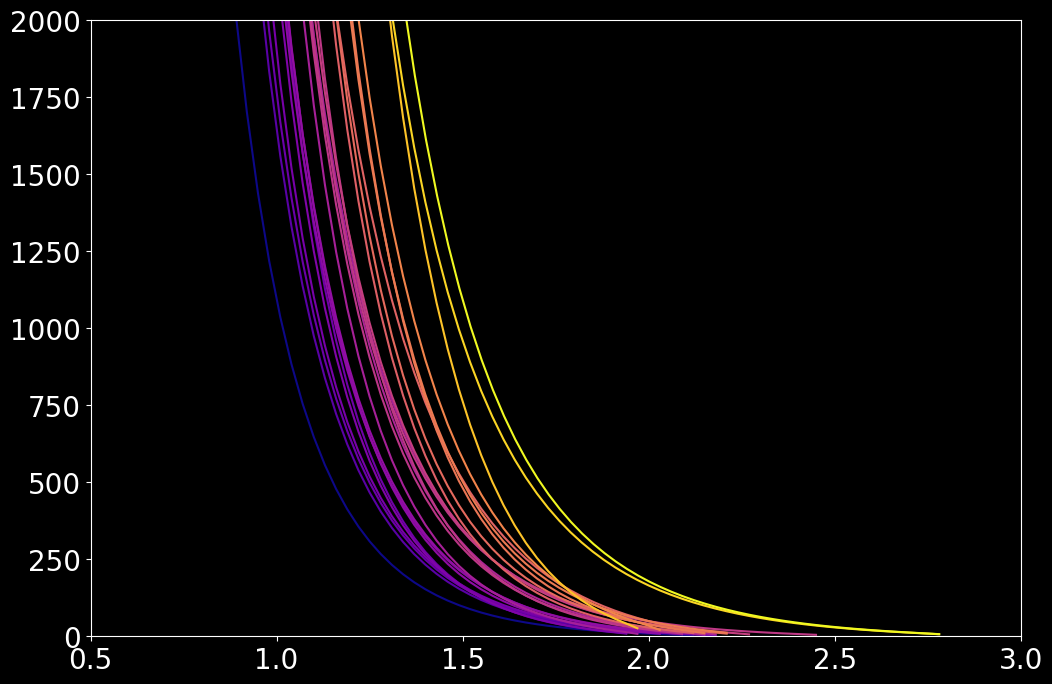

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))

for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
#        print(eos)
    except:
        continue
    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))
    mlamtable=[]
    for q in [1]:
      tbl2 = [[],[]]
      sml = lalsim.SimNeutronStarFamMinimumMass(fam) / q  # minimum mass for this EOS, in kg
      big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
      m   = max(sml, 0.5*lal.MSUN_SI / q)                     # mass of the star. will be iterated over from sml to big
      while m < big:
        rad1 = lalsim.SimNeutronStarRadius(m, fam)
        lov1 = lalsim.SimNeutronStarLoveNumberK2(m, fam)
        lam1 = (2/3) * lov1 * (((rad1/m)*(lal.C_SI**2/lal.G_SI))**5)

        m1 = m/lal.MSUN_SI                          # converts m to units of msun

        tbl2[0].append(m1)
        tbl2[1].append(lam1)
        m += 0.03 * lal.MSUN_SI
#    print(eos)
      plt.plot(tbl2[0], tbl2[1], label=eos, color = eoscolor)


sp1.set_title('', fontsize=24)
#sp1.set_xlabel(r'$M (M_\odot)$')
#sp1.set_ylabel(r'$\Lambda$')
#plt.legend(loc="upper right", fontsize = 10)
#plt.yscale('log')
plt.ylim(0,2000)
plt.xlim(0.5,3)

## Binary models

In [ ]:
def mchirp_to_component_q1(mch):
    return mass1_from_mchirp_q(mch,1)
def component_to_mchirp_q1(m):
    return mchirp_from_mass1_mass2(m,m)


<ipython-input-73-6c10ee29bc07>:52: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize = 10)
<ipython-input-73-6c10ee29bc07>:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
<ipython-input-11-d2433baba789>:7: RuntimeWarning: invalid value encountered in divide
  return mass1*mass2 / (mass1+mass2)**2.


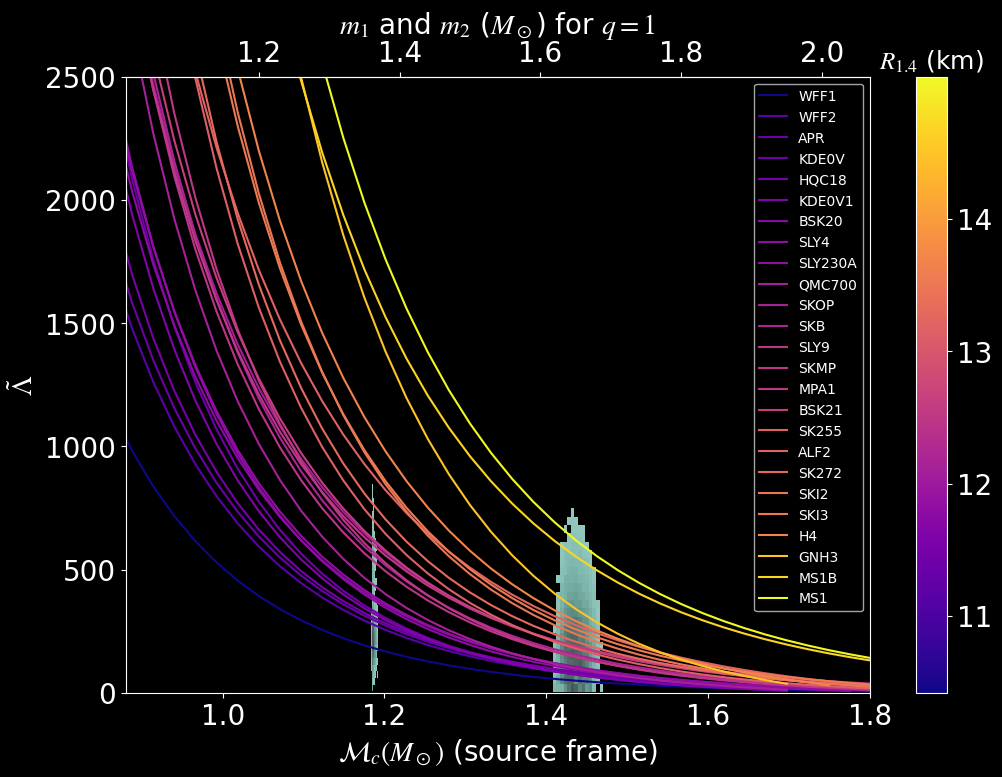

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))
q=1
for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
        #print(eos)
    except:
        continue

    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    sml = lalsim.SimNeutronStarFamMinimumMass(fam)  # minimum mass for this EOS, in kg
    big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
    m   = max(sml, 0.9*lal.MSUN_SI)                     # mass of the star. will be iterated over from sml to big
    tbl2 = [[],[]]
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))

    while m < big:
        rad1 = lalsim.SimNeutronStarRadius(m, fam)
        lov1 = lalsim.SimNeutronStarLoveNumberK2(m, fam)
        lam1 = (2/3) * lov1 * (((rad1/m)*(lal.C_SI**2/lal.G_SI))**5)

        m1 = m/lal.MSUN_SI                          # converts m to units of msun

        m2 = m * q
        rad2 = lalsim.SimNeutronStarRadius(m2, fam)
        lov2 = lalsim.SimNeutronStarLoveNumberK2(m2, fam)
        lam2 = (2/3) * lov2 * (((rad2/m)*(lal.C_SI**2/lal.G_SI))**5)

        m2 = m2 /lal.MSUN_SI

        tbl2[0].append(mchirp_from_mass1_mass2(m1,m2))
        tbl2[1].append(lambdatilde(lam1,lam2,m1,m2))
        m += 0.03 * lal.MSUN_SI


    plt.plot(tbl2[0], tbl2[1], label=eos, color = eoscolor)

sns.histplot(data=lowSpinPos, x='mchirp_source', y='lamtilde', label='GW170817', log_scale=(False,False),
            weights = lowSpinPos['weights'],
             bins = (10,60),pthresh=.1)
sns.histplot(data=GW190425lowSpinPos, x='chirp_mass_source', y='lamtilde', label='GW190425',log_scale=(False,False),
            weights = GW190425lowSpinPos['weights'],
             bins=(20,120),pthresh=.1)

#sp1.set_title(r'$q=$'+str(q), fontsize=24)
sp1.set_xlabel(r'$\mathcal{M}_c (M_\odot)$ (source frame)')
sp1.set_ylabel(r'$\tilde\Lambda$')
ax =fig1.axes[0]
secax = ax.secondary_xaxis('top', functions=(mchirp_to_component_q1, component_to_mchirp_q1))
secax.set_xlabel(r'$m_1$ and $m_2$ ($M_\odot$) for $q=1$')
plt.legend(loc="upper right", fontsize = 10)
#plt.yscale('log')
plt.ylim(0,2500)
plt.xlim(0.88,1.8)
tickvals =  [(11*1000-rmin)/(rmax-rmin),(12*1000-rmin)/(rmax-rmin),(13*1000-rmin)/(rmax-rmin),(14*1000-rmin)/(rmax-rmin)]
ticklabels = ['11','12','13','14']
cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
cbar.ax.set_yticklabels(ticklabels)
cbar.ax.set_title(r'$R_{1.4}$ (km)', fontsize=18)
plt.show()

In [ ]:
def mchirp_to_component_q(mch):
    return mass1_from_mchirp_q(mch,1/q)
def component_to_mchirp_q(m1):
    return mchirp_from_mass1_mass2(q*m1,m1)

<ipython-input-121-fbfd538ada8f>:55: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize = 10)
<ipython-input-121-fbfd538ada8f>:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
<ipython-input-11-d2433baba789>:7: RuntimeWarning: invalid value encountered in divide
  return mass1*mass2 / (mass1+mass2)**2.


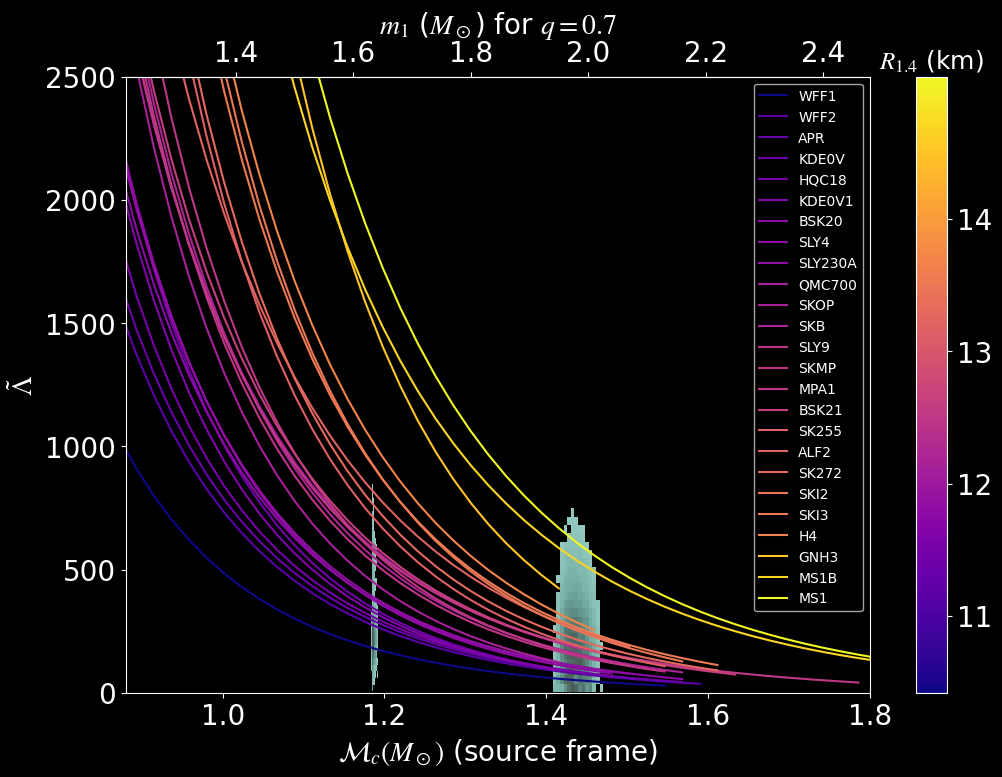

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))
q=0.7


for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
        #print(eos)
    except:
        continue

    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    sml = lalsim.SimNeutronStarFamMinimumMass(fam)  # minimum mass for this EOS, in kg
    big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
    m   = max(sml, 0.9*lal.MSUN_SI)                     # mass of the star. will be iterated over from sml to big
    tbl2 = [[],[]]
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))

    while m < big:
        m1=m
        rad1 = lalsim.SimNeutronStarRadius(m1, fam)
        lov1 = lalsim.SimNeutronStarLoveNumberK2(m1, fam)
        lam1 = (2/3) * lov1 * (((rad1/m1)*(lal.C_SI**2/lal.G_SI))**5)

        m1 = m/lal.MSUN_SI                          # converts m to units of msun

        m2 = m * q
        rad2 = lalsim.SimNeutronStarRadius(m2, fam)
        lov2 = lalsim.SimNeutronStarLoveNumberK2(m2, fam)
        lam2 = (2/3) * lov2 * (((rad2/m2)*(lal.C_SI**2/lal.G_SI))**5)

        m2 = m2 /lal.MSUN_SI

        tbl2[0].append(mchirp_from_mass1_mass2(m1,m2))
        tbl2[1].append(lambdatilde(lam1,lam2,m1,m2))
        m += 0.03 * lal.MSUN_SI


    plt.plot(tbl2[0], tbl2[1], label=eos, color = eoscolor)

sns.histplot(data=lowSpinPos, x='mchirp_source', y='lamtilde', label='GW170817', log_scale=(False,False),
            weights = lowSpinPos['weights'],
             bins = (10,60),pthresh=.1)
sns.histplot(data=GW190425lowSpinPos, x='chirp_mass_source', y='lamtilde', label='GW190425',log_scale=(False,False),
            weights = GW190425lowSpinPos['weights'],
             bins=(20,120),pthresh=.1)

#sp1.set_title(r'$q=$'+str(q), fontsize=24)
ax =fig1.axes[0]
secax = ax.secondary_xaxis('top', functions=(mchirp_to_component_q, component_to_mchirp_q))
secax.set_xlabel(r'$m_1$ ($M_\odot$) for $q=0.7$')
sp1.set_xlabel(r'$\mathcal{M}_c (M_\odot)$ (source frame)')
sp1.set_ylabel(r'$\tilde\Lambda$')
plt.legend(loc="upper right", fontsize = 10)
#plt.yscale('log')
plt.ylim(0,2500)
plt.xlim(0.88,1.8)
tickvals =  [(11*1000-rmin)/(rmax-rmin),(12*1000-rmin)/(rmax-rmin),(13*1000-rmin)/(rmax-rmin),(14*1000-rmin)/(rmax-rmin)]
ticklabels = ['11','12','13','14']
cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
cbar.ax.set_yticklabels(ticklabels)
cbar.ax.set_title(r'$R_{1.4}$ (km)',fontsize=18)
plt.show()

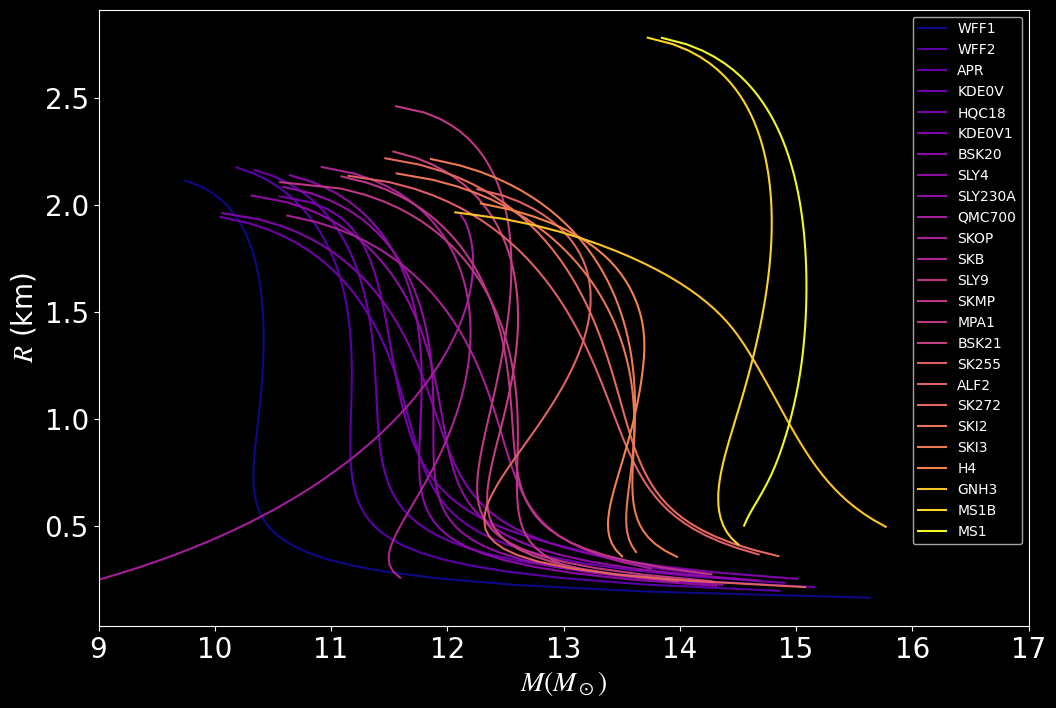

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))

for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
        #print(eos)
    except:
        continue

    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    sml = lalsim.SimNeutronStarFamMinimumMass(fam)  # minimum mass for this EOS, in kg
    big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
    m   = sml #, 0.9*lal.MSUN_SI)                     # mass of the star. will be iterated over from sml to big
    tbl2 = [[],[]]
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))

    while m < big:
        rad = lalsim.SimNeutronStarRadius(m, fam)
        lov = lalsim.SimNeutronStarLoveNumberK2(m, fam)
        m_insolar = m/lal.MSUN_SI                          # converts m to units of msun
        #mchirp = mchirp_from_mass1_mass2(m_insolar, m_insolar)
        lam = (2/3) * lov * (((rad/m)*(lal.C_SI**2/lal.G_SI))**5)
        tbl2[0].append(m_insolar)
        tbl2[1].append(rad)
        m += 0.03 * lal.MSUN_SI
    plt.plot(np.array(tbl2[1])/1000, tbl2[0], label=eos, color = eoscolor)

#plt.yscale('log')
plt.xlim(9,17)
sp1.set_title('', fontsize=24)
sp1.set_xlabel(r'$M (M_\odot)$')
sp1.set_ylabel(r'$R$ (km)')
plt.legend(loc="upper right", fontsize = 10)

Text(0.5, 1.0, '')

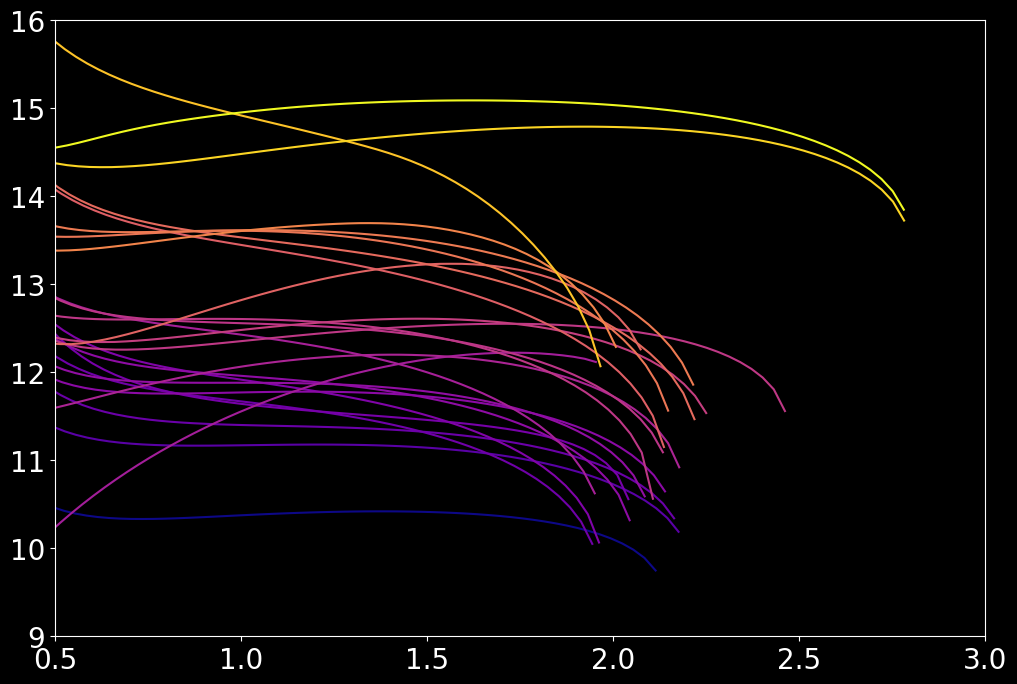

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))

for eos in np.array(eoss)[np.argsort(np.array(radii))]:
    try:
        eosname = lalsim.SimNeutronStarEOSByName(eos)
        #print(eos)
    except:
        continue

    fam = lalsim.CreateSimNeutronStarFamily(eosname)
    sml = lalsim.SimNeutronStarFamMinimumMass(fam)  # minimum mass for this EOS, in kg
    big = lalsim.SimNeutronStarMaximumMass(fam)     # maximum mass for this EOS, in kg
    m   = sml #, 0.9*lal.MSUN_SI)                     # mass of the star. will be iterated over from sml to big
    tbl2 = [[],[]]
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))

    while m < big:
        rad = lalsim.SimNeutronStarRadius(m, fam)
        lov = lalsim.SimNeutronStarLoveNumberK2(m, fam)
        m_insolar = m/lal.MSUN_SI                          # converts m to units of msun
        #mchirp = mchirp_from_mass1_mass2(m_insolar, m_insolar)
        lam = (2/3) * lov * (((rad/m)*(lal.C_SI**2/lal.G_SI))**5)
        tbl2[0].append(m_insolar)
        tbl2[1].append(rad)
        m += 0.03 * lal.MSUN_SI
    plt.plot(tbl2[0],np.array(tbl2[1])/1000,  label=eos, color = eoscolor)

#plt.yscale('log')
plt.ylim(9,16)
plt.xlim(0.5,3.0)

sp1.set_title('', fontsize=24)
#sp1.set_ylabel(r'$M (M_\odot)$')
#sp1.set_xlabel(r'$R$ (km)')
#plt.legend(loc="upper right", fontsize = 10)

(3e+31, 1e+37)

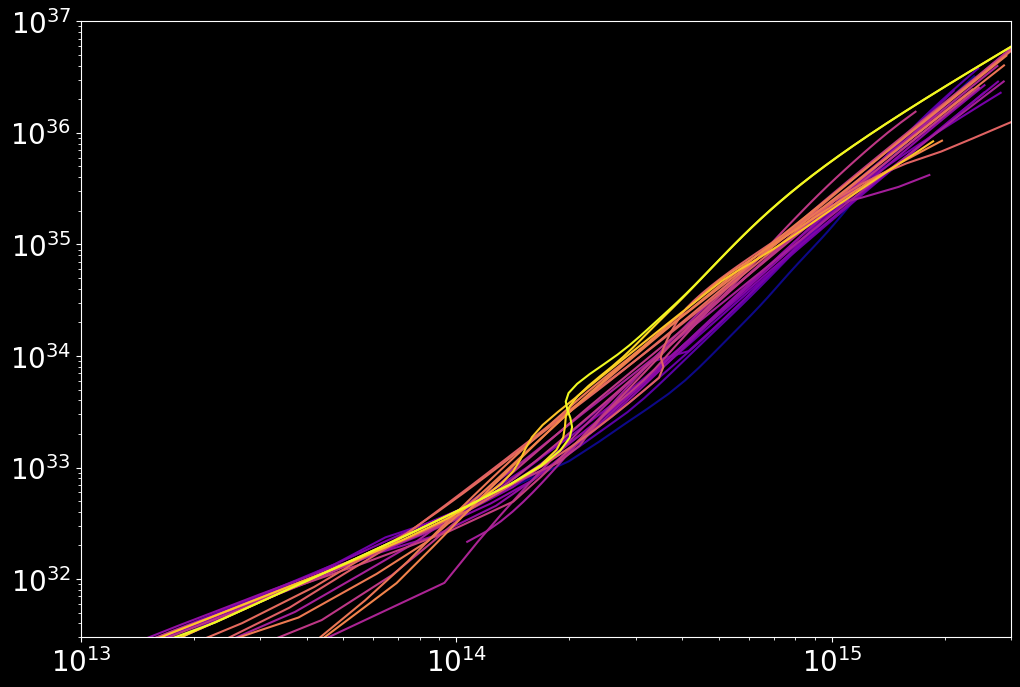

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,8))

energy_cgs_factor =  pow(lal.C_SI,2) / lal.G_SI / 1000 # kg/m^3 in SI to g/cm^3 in cgs
pressure_cgs_factor =  pow(lal.C_SI,4) / lal.G_SI * 10 # pascals in SI to dyne/ cm^2 in cgs

for eosname in np.array(eoss)[np.argsort(np.array(radii))]:#[np.array(maxmasses) > 2.0]:
    try:
        eos = lalsim.SimNeutronStarEOSByName(eosname)
    except:
        print(eosname)
        continue
    fam = lalsim.CreateSimNeutronStarFamily(eos)
    refrad = lalsim.SimNeutronStarRadius(lal.MSUN_SI*1.4, fam)
    eoscolor = plt.cm.plasma((refrad-rmin)/(rmax-rmin))
    maxenthalpy = lalsim.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
    enthalpy = 0.005 #lalsim.SimNeutronStarEOSPseudoEnthalpyOfPressure(1e12 / pressure_cgs_factor, eos) #start
    rho = []
    press = []
    while enthalpy < maxenthalpy:
      rho.append(lalsim.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpyGeometerized(enthalpy, eos))
      press.append(lalsim.SimNeutronStarEOSPressureOfPseudoEnthalpyGeometerized(enthalpy, eos))
      enthalpy = enthalpy*1.1
    plt.loglog(np.array(rho)*energy_cgs_factor, np.array(press)*pressure_cgs_factor, label=eosname, color = eoscolor)

sp1.set_title('', fontsize=24)
#sp1.set_xlabel(r'$\rho$ in g/cm$^3$')
#sp1.set_ylabel(r'$p$ in dyne/cm$^2$')
plt.xlim(1e13,3e15)
plt.ylim(3e31,1e37)
#plt.legend(loc="upper left", fontsize = 10)
#tickvals =  [(11*1000-rmin)/(rmax-rmin),(12*1000-rmin)/(rmax-rmin),(13*1000-rmin)/(rmax-rmin),(14*1000-rmin)/(rmax-rmin)]
#cbar=plt.colorbar(plt.cm.ScalarMappable( cmap=plt.cm.plasma), ticks=tickvals)
#cbar.ax.set_yticklabels([11,12,13,14])
#cbar.ax.set_title(r'$R_{1.4}$ (km)')

# Waveform Impact

In [ ]:
try:
  import pycbc
except:
  ! pip install pycbc
  import pycbc
from pycbc import waveform
from pycbc import psd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pegasus-wms.api: filename=

In [ ]:
mass1 = 1.35
mass2 = 1.35
lambda1 = 500
lambda2 = 500
distance_ref = 100
f_low_compare=50

lambda_list = [0,500,1000,1500,2000]
lambda_color = plt.cm.plasma(np.array(lambda_list)/lambda_list[-1])

approx_list = ['TEOBResumS','SEOBNRv4T'] # time domain with realistic end of inspiral
TEOBModels = {}
SEOBModels = {} # does not work in colab environment without extra tweaks

for lambdaval in lambda_list:
    hp,hc= waveform.get_td_waveform(approximant='TEOBResumS',
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= lambdaval,
                                 lambda2= lambdaval,
                                 distance= distance_ref,
                                 delta_t=1.0/4096/4,
                                 f_lower=f_low_compare)
    TEOBModels[lambdaval] = {}
    TEOBModels[lambdaval]['strain_plus'] = hp
    TEOBModels[lambdaval]['strain_cross'] = hc
    TEOBModels[lambdaval]['strain_amplitude'] = waveform.utils.amplitude_from_polarizations(hp, hc)
    TEOBModels[lambdaval]['strain_phase'] = waveform.utils.phase_from_polarizations(hp, hc)
    #plt.plot(hp.sample_times, hp, label=apx)


In [ ]:
# instantaneous frequency
for lambdaval in lambda_list:
   dphi = np.gradient(
      np.array(TEOBModels[lambdaval]['strain_phase']),
      TEOBModels[lambdaval]['strain_phase'].delta_t)
   TEOBModels[lambdaval]['freq'] = dphi / (2 * np.pi)
   TEOBModels[lambdaval]['fdot'] = np.gradient(TEOBModels[lambdaval]['freq'], TEOBModels[lambdaval]['strain_phase'].sample_times)
   TEOBModels[lambdaval]['time_gradient'] = 1. / TEOBModels[lambdaval]['fdot']


In [ ]:
for lambdaval in lambda_list:
# promote time to a column for easy access
   TEOBModels[lambdaval]['time'] = TEOBModels[lambdaval]['strain_plus'].sample_times
# maximum frequency ~ end of inspiral
   chirp_index = np.argmax(TEOBModels[lambdaval]['freq'])
   TEOBModels[lambdaval]['chirp'] = chirp_index
# lowest common frequency of inspirals: we will need to chose f_c at or below this value
common_upper_freq = np.max([TEOBModels[lambdaval]['freq'][TEOBModels[lambdaval]['chirp']] for lambdaval in lambda_list])
#common_upper_freq = 1500
print(common_upper_freq)

6624.564555750674


In [ ]:
freq_ref=100


for lambdaval in lambda_list:
    TEOBModels[lambdaval]['tref'] = np.interp(
        freq_ref,
        TEOBModels[lambdaval]['freq'][:TEOBModels[lambdaval]['chirp']],
        TEOBModels[lambdaval]['time'][:TEOBModels[lambdaval]['chirp']])
    TEOBModels[lambdaval]['phic'] = np.interp(
        freq_ref,
        TEOBModels[lambdaval]['freq'][:TEOBModels[lambdaval]['chirp']],
        TEOBModels[lambdaval]['strain_phase'][:TEOBModels[lambdaval]['chirp']])

    print(TEOBModels[lambdaval]['phic'] ,TEOBModels[lambdaval]['tref'] )

endtime = TEOBModels[0]['time'][-1]- TEOBModels[0]['tref']

5104.470312889879 -2.3283971216797874
5104.417179187001 -2.32486718901718
5104.363625894963 -2.322485950539387
5104.3099687187705 -2.3203908186398863
5104.256235812333 -2.318465258299833


(2.230409102179788, 2.330409102179788)

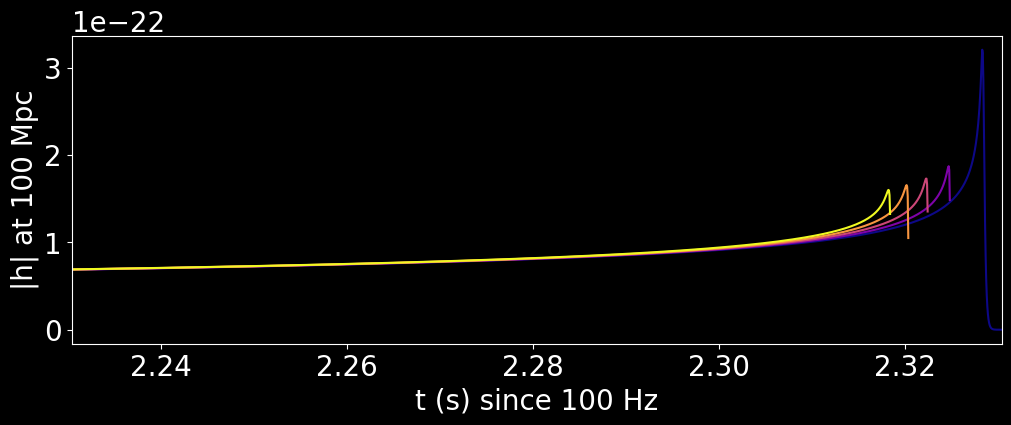

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,4))

for lambdaval, color in zip(lambda_list,lambda_color):
    plt.plot(TEOBModels[lambdaval]['time'] - TEOBModels[lambdaval]['tref'],
                TEOBModels[lambdaval]['strain_amplitude'], label=lambdaval, color = color
    )
plt.xlabel('t (s) since 100 Hz')
plt.ylabel('|h| at 100 Mpc')
plt.xlim (endtime-0.1, endtime)

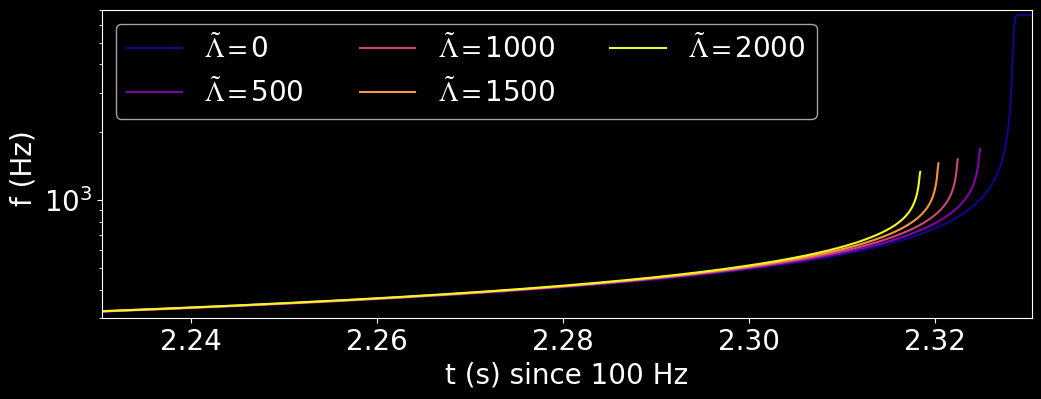

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,4))

for lambdaval, color in zip(lambda_list,lambda_color):
    plt.semilogy(TEOBModels[lambdaval]['time'] - TEOBModels[lambdaval]['tref'],
                TEOBModels[lambdaval]['freq'], label=r'$\tilde\Lambda=$'+str(lambdaval),color = color
    )
plt.xlabel(r't (s) since 100 Hz')
plt.ylabel(r'f (Hz) ')
plt.ylim(300,7000)
plt.xlim (endtime-0.1, endtime)
plt.legend(loc="upper left", ncol=3)

(-4e-22, 4e-22)

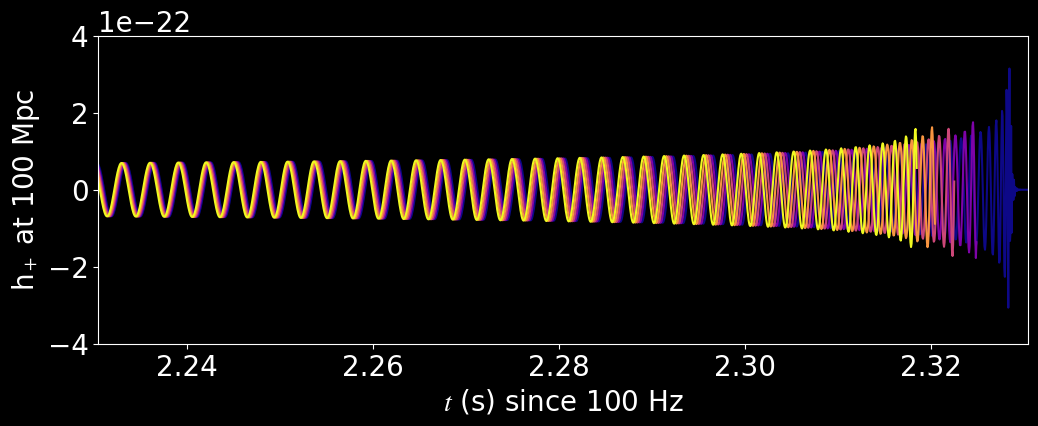

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,4))

for lambdaval, color in zip(lambda_list,lambda_color):
    plt.plot(TEOBModels[lambdaval]['time'] - TEOBModels[lambdaval]['tref'],
                TEOBModels[lambdaval]['strain_plus'], label=r'$\tilde\Lambda=$'+str(lambdaval),
             color = color
    )
plt.xlabel(r'$t$ (s) since 100 Hz')
plt.ylabel(r'h$_+$ at 100 Mpc')
plt.xlim (endtime-0.1, endtime)
plt.ylim(-4e-22,4e-22)
#plt.legend(loc="lower center", ncol=len(lambda_list),fontsize=16)

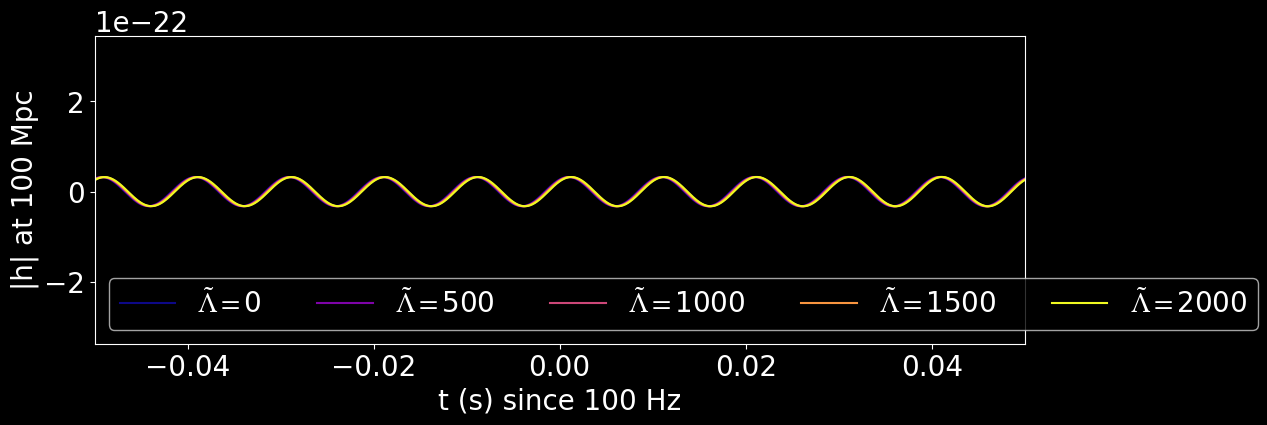

In [ ]:
fig1, sp1 = plt.subplots(1, 1, figsize=(12,4))

for lambdaval, color in zip(lambda_list,lambda_color):
    plt.plot(TEOBModels[lambdaval]['time'] - TEOBModels[lambdaval]['tref'],
                TEOBModels[lambdaval]['strain_plus'], label=r'$\tilde\Lambda=$'+str(lambdaval),
             color = color
    )
plt.xlabel('t (s) since 100 Hz')
plt.ylabel('|h| at 100 Mpc')
plt.xlim (-0.05, 0.05)
plt.legend(loc="lower left", ncol=len(lambda_list))